# Do Modelo à Estratégia: Como Medir o Impacto Financeiro de uma Solução de Machine Learning no Setor Bancário

## Sumário

- 1. Importando as Bibliotecas Necessárias
- 2. Carregando os dados
- 3. Avaliando as Variáveis
- 4. Análise Exploratória e Visualização de Dados
- 5. Seleção de Variáveis
- 6. Tratamento das variáveis categóricas
- 7. Separando as variáveis independentes da Target
- 8. Normalização
- 9. Modelo de Regressão logística
- 10. Avaliação do modelo Regressão logística
 
A base de dados utilizada pode ser encontrada em: [Kaggle.com](https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions/data)

Para entender o contexto de negócio em que o código abaixo foi utilizado veja o artigo no Medium: [https://medium.com/@fagna.felix/](). Tempo de leitura, 8 minutos. 

### 1. Importando as Bibliotecas Necessárias

In [1]:
# Bibliotecas de manipulação de dados e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para dividir os dados e criar modelos
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Módulo de Análise Exploratória
import aed

### 2. Carregando os dados

In [2]:
# Carregando o dataset
df = pd.read_csv("train.csv")

# Visualizando as primeiras linhas dos dados
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 3. Avaliando as Variáveis

In [3]:
# Verificando o tipo de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Resumo estatístico das variáveis numéricas
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# Verificando valores ausentes
print("Valores ausentes:\n", df.isnull().sum())

Valores ausentes:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### 4. Análise Exploratória e Visualização de Dados

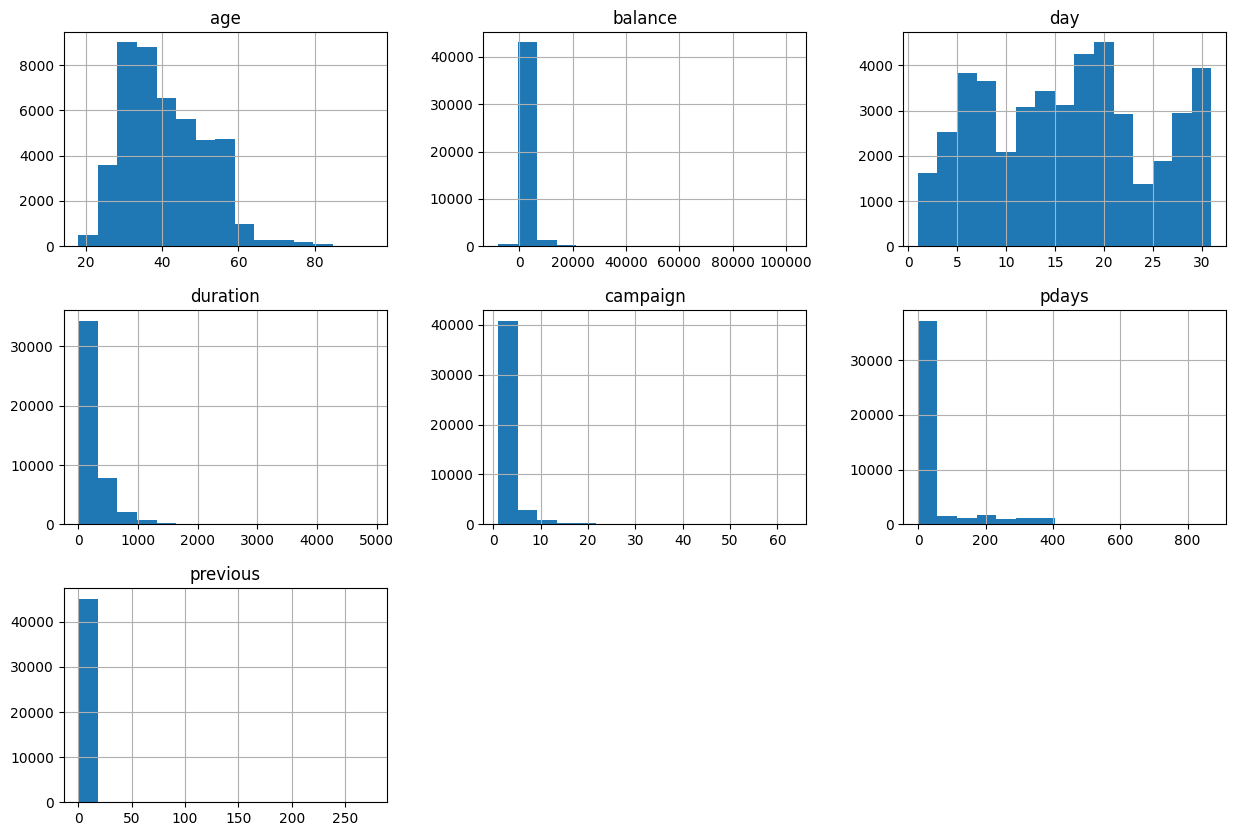

In [6]:
# Distribuição das variáveis numéricas
df.hist(bins=15, figsize=(15, 10))
plt.show()

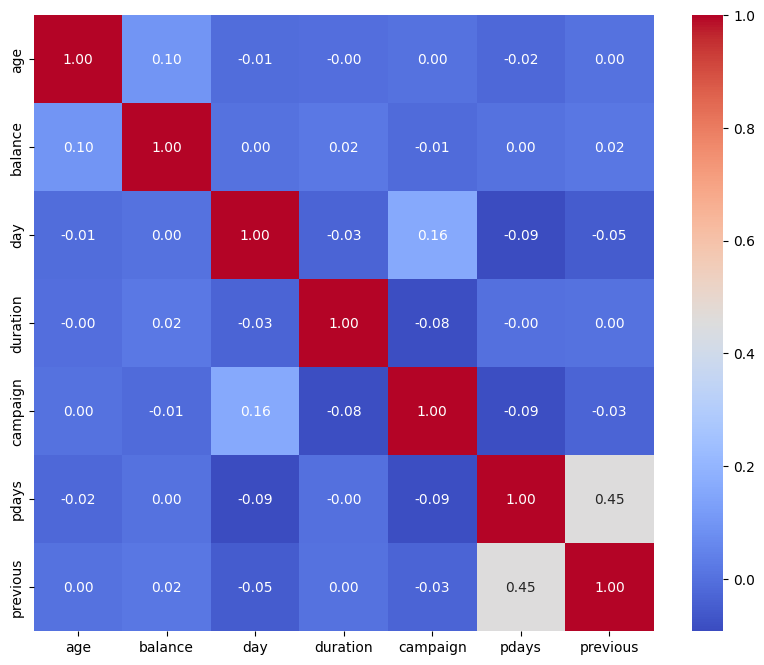

In [7]:
# Mapa de calor de correlação apenas entre as variáveis númericas 
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### 5. Seleção de Variáveis

A seleção de variáveis para o modelo de Machine Learning foi realizada usando Information Value. Seleção feita previamente via Excel:

![Tabela Information Value (IV)](IV.png)

Agora removemos as variáveis que não serão usadas no modelo. Neste caso, as variáveis que serão usadas no modelo são: age, job, housing, contact, month, duration, pdays, previous e poutcome. As variáveis especificadas no código abaixo serão removidas da base de dados.

In [8]:
# 1. Removendo variáveis irrelevantes para o modelo pelo Information Value feita no Excel
df.drop(['marital','education','default','balance','loan','day','campaign'], axis=1, inplace = True)

Agora vamos avaliar a presença de valores atípicos (outliers) nas variáveis que serão modeladas

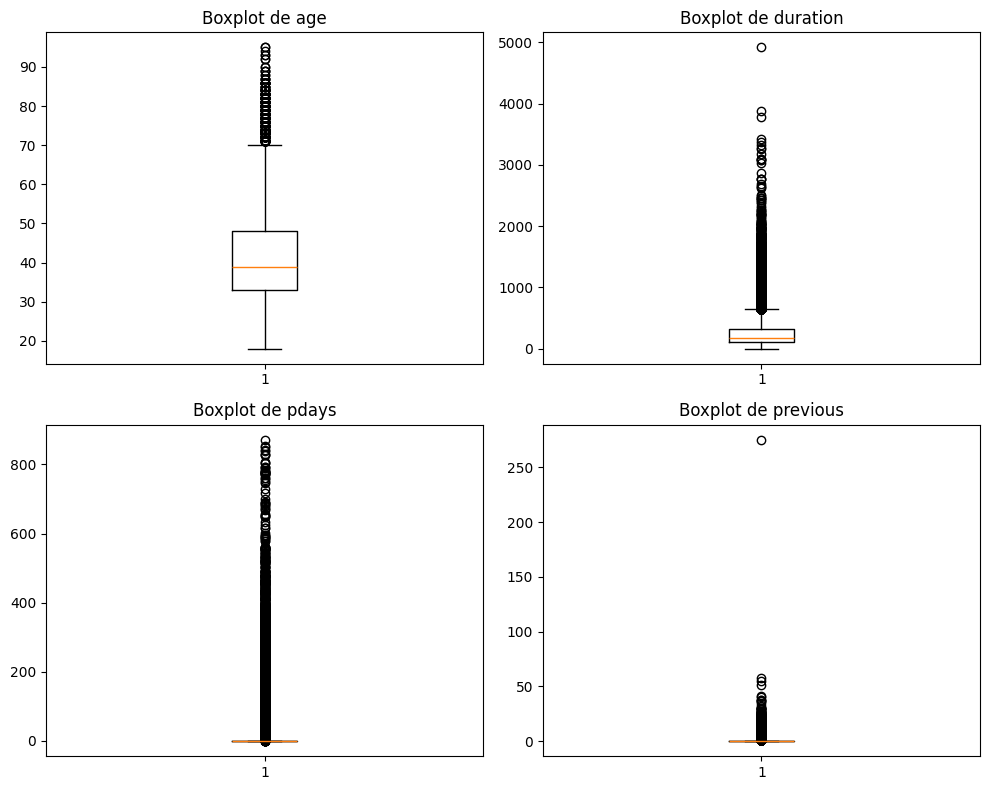

In [9]:
# Variáveis numéricas
colunas = ['age', 'duration', 'pdays', 'previous']

# Criando figura com 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Achatando dos eixos (para facilitar o loop)
axs = axs.flatten()

# Plotando cada variável em um subplot
for i, col in enumerate(colunas):
    axs[i].boxplot(df[col])
    axs[i].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

Parece que as observações identificadas como atípicas são característicos dos dados e por isso não devem ser eliminadas, claro que esses valores podem interferir no desempenho do modelo, mas técnicas de normalização ou padronização podem resolver esse problema.

### 6. Tratar variáveis categóricas

In [10]:
label_encoder = LabelEncoder()

# Para as colunas categóricas
df['job'] = label_encoder.fit_transform(df['job'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df['y'] = label_encoder.fit_transform(df['y'])  # target

In [11]:
display(df)

,age,job,housing,contact,month,duration,pdays,previous,poutcome,y
0,58,4,1,2,8,261,-1,0,3,0
1,44,9,1,2,8,151,-1,0,3,0
2,33,2,1,2,8,76,-1,0,3,0
3,47,1,1,2,8,92,-1,0,3,0
4,33,11,0,2,8,198,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,9,0,0,9,977,-1,0,3,1
45207,71,5,0,0,9,456,-1,0,3,1
45208,72,5,0,0,9,1127,184,3,2,1
45209,57,1,0,1,9,508,-1,0,3,0


### 7. Separar variáveis independentes da Target

In [12]:
X = df.drop(columns=['y'])  # Variáveis independentes
y = df['y']  # Variável dependente

### 8. Dividir os dados em treino e teste e Normalização

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

# Aplicando a padronização nas variáveis numéricas
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 9. Modelo de Regressão logística

In [15]:
# 1. Criando o modelo de regressão logística
model = LogisticRegression(random_state=42)

# 2. Treinando o modelo com os dados de treino
model.fit(X_train_scaled, y_train)

# 3. Fazendo previsões
y_pred_train = model.predict(X_train_scaled)  # Previsão no treino
y_pred_test = model.predict(X_test_scaled)    # Previsão no teste

### 10. Avaliação do modelo Regressão logística

In [16]:
# 4. Matriz de Confusão
print("Matriz de Confusão (Treinamento):\n", confusion_matrix(y_train, y_pred_train))
print("Matriz de Confusão (Teste):\n", confusion_matrix(y_test, y_pred_test))

# 5. Acurácia
print("Acurácia (Treinamento): ", accuracy_score(y_train, y_pred_train))
print("Acurácia (Teste): ", accuracy_score(y_test, y_pred_test))

# 6. Relatório F1-Score (com precisão e recall incluídos)
print("Relatório de Classificação (Treinamento):\n", classification_report(y_train, y_pred_train))
print("Relatório de Classificação (Teste):\n", classification_report(y_test, y_pred_test))

Matriz de Confusão (Treinamento):
 [[31407   563]
 [ 3319   879]]
Matriz de Confusão (Teste):
 [[7798  154]
 [ 867  224]]
Acurácia (Treinamento):  0.8926675514266755
Acurácia (Teste):  0.8870949906004645
Relatório de Classificação (Treinamento):
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.61      0.21      0.31      4198

    accuracy                           0.89     36168
   macro avg       0.76      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168

Relatório de Classificação (Teste):
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.21      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



In [17]:
# 7. AUC-ROC (precisa da probabilidade da classe positiva)
y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe positiva
auc_score = roc_auc_score(y_test, y_pred_proba_test)
print(f"AUC-ROC (Teste): {auc_score:.4f}")

AUC-ROC (Teste): 0.8548


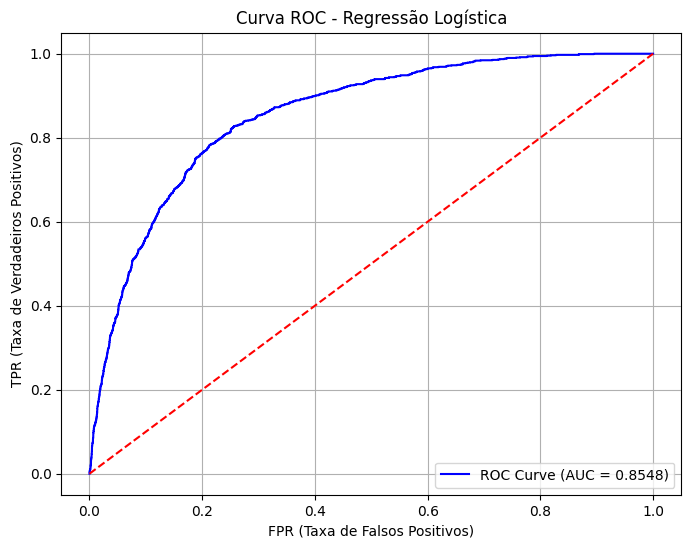

In [18]:
# 8. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Linha aleatória
plt.xlabel('FPR (Taxa de Falsos Positivos)')
plt.ylabel('TPR (Taxa de Verdadeiros Positivos)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

A principio o resultado parece ótimo, mas com um impacto bem ruim para o negócio. Em artigos futuros vamos trabalhar na melhoria do modelo de dados para o négócio e ao final vamos vamos discutir porque o uso de algumas variáveis nesse modelo não fazem sentido, e podem gerar um problema de data leakage.